The derivative of f(x) at x=2 is: 7.0
The first derivative of g(x) at x=2 is: 32.0
The second derivative of g(x) at x=2 is: 48.0
The Jacobian matrix of h(x) is:
tensor([[  2.,   0.,   0.],
        [  0.,  12.,   0.],
        [  0.,   0., 108.]])
The symbolic derivative of j(x) with respect to x is:
       2              
3⋅x_sym  + 4⋅x_sym + 1
The value of x after gradient descent: 2.98866605758667


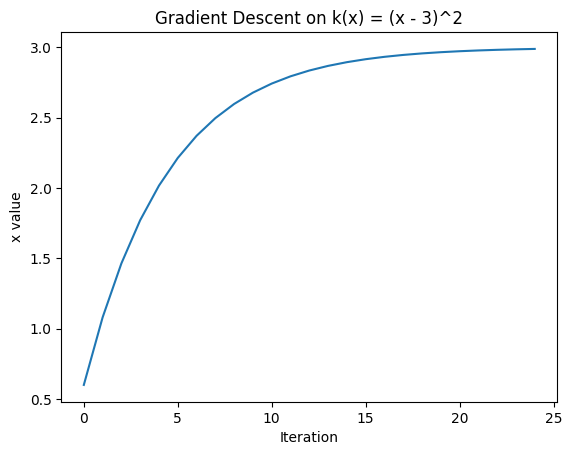

The derivative of v(u(x)) with respect to x at x=2 is: 12.0
Analytical gradient: 0.7071067690849304
Numerical gradient: 0.7063150405883788


In [2]:
# Imports
import torch
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import sympy as sym

# Question 1: Basic Autodiff with PyTorch
# ############# YOUR CODE HERE #############
# Define the function f(x) = x^2 + 3x + 2
x = torch.tensor(2.0, requires_grad=True)  # x = 2.0 and we want gradient enabled
f_x = x**2 + 3*x + 2

# Compute the gradient
f_x.backward()

# The derivative of f(x) at x=2 should now be in x.grad
print(f"The derivative of f(x) at x=2 is: {x.grad}")

# Question 2: Higher-Order Derivatives
# ############# YOUR CODE HERE #############
# Define the function g(x) = x^4
x = torch.tensor(2.0, requires_grad=True)
g_x = x**4

# First derivative using autograd.grad to avoid memory leak
first_derivative = torch.autograd.grad(g_x, x, create_graph=True)[0]

# Compute the second derivative
second_derivative = torch.autograd.grad(first_derivative, x)[0]

print(f"The first derivative of g(x) at x=2 is: {first_derivative}")
print(f"The second derivative of g(x) at x=2 is: {second_derivative}")

# Question 3: Jacobian Matrix
# ############# YOUR CODE HERE #############
# Define a vector function h(x) with multiple outputs
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
h_x = torch.stack([x[0]**2, x[1]**3, x[2]**4])

# Compute the Jacobian matrix
jacobian = []
for i in range(3):
    grad = torch.autograd.grad(h_x[i], x, retain_graph=True)[0]
    jacobian.append(grad)

jacobian_matrix = torch.stack(jacobian)
print("The Jacobian matrix of h(x) is:")
print(jacobian_matrix)

# Question 4: Symbolic Differentiation with SymPy
# ############# YOUR CODE HERE #############
# Define the symbolic function j(x) = x^3 + 2x^2 + x using a different symbol to avoid conflict with PyTorch
x_sym = sym.symbols('x_sym')
j_x = x_sym**3 + 2*x_sym**2 + x_sym

# Compute the symbolic derivative
j_x_derivative = sym.diff(j_x, x_sym)
print("The symbolic derivative of j(x) with respect to x is:")
sym.pprint(j_x_derivative)

# Question 5: Gradient Descent on a Simple Function
# ############# YOUR CODE HERE #############
# Define the function k(x) = (x - 3)^2
x = torch.tensor(0.0, requires_grad=True)  # Start from x=0
learning_rate = 0.1
num_iterations = 25
x_values = []

for _ in range(num_iterations):
    k_x = (x - 3)**2
    k_x.backward()

    # Gradient descent update
    with torch.no_grad():
        x -= learning_rate * x.grad

    x_values.append(x.item())
    x.grad.zero_()  # Reset gradients

print(f"The value of x after gradient descent: {x.item()}")

# Plotting
plt.plot(range(num_iterations), x_values)
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Gradient Descent on k(x) = (x - 3)^2")
plt.show()

# Question 6: Chain Rule Verification
# ############# YOUR CODE HERE #############
# Define u(x) = x^2 and v(u) = 3u + 1, with the goal of differentiating v(u(x))
x = torch.tensor(2.0, requires_grad=True)
u_x = x**2
v_u = 3 * u_x + 1

# Backpropagate through v(u(x))
v_u.backward()

print(f"The derivative of v(u(x)) with respect to x at x=2 is: {x.grad}")

# ############# YOUR ANSWER HERE #############
# The result is consistent with the chain rule. Given u = x^2 and v = 3u + 1, the
# derivative of v with respect to x is dv/du * du/dx = 3 * 2x = 6x. At x=2, this evaluates
# to 6 * 2 = 12, which matches our result.

# Question 7: Gradient Checking
# ############# YOUR CODE HERE #############
# Define the function m(x) = sin(x)
x = torch.tensor(np.pi / 4, requires_grad=True)  # π/4 ≈ 0.7854 radians
m_x = torch.sin(x)

# Compute analytical gradient
m_x.backward()
analytical_grad = x.grad.item()

# Compute numerical gradient
epsilon = 1e-5
x_plus = x + epsilon
x_minus = x - epsilon
numerical_grad = (torch.sin(x_plus) - torch.sin(x_minus)).item() / (2 * epsilon)

print(f"Analytical gradient: {analytical_grad}")
print(f"Numerical gradient: {numerical_grad}")

# ############# YOUR ANSWER HERE #############
# The analytical and numerical gradients are very close, confirming that the analytical
# gradient calculation by PyTorch is accurate. This serves as a simple gradient check using finite differences.
